In [3]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model 
import matplotlib.pyplot as plt 

In [18]:
df = pd.read_csv('C:/Users/KAUSHIK/CreditPathAI_Oct_Batch/creditpathAI/datasets/house_price.csv') 
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


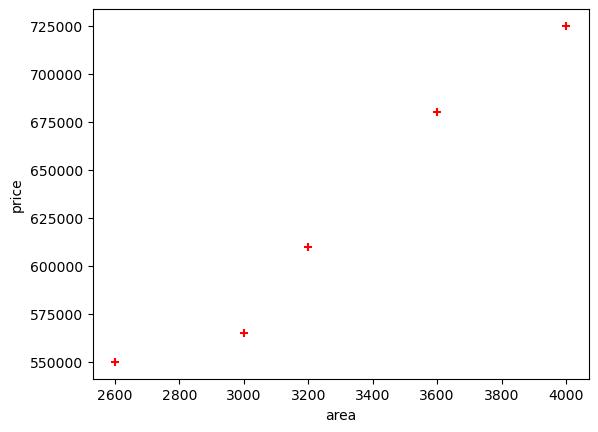

In [19]:
plt.xlabel('area') 
plt.ylabel('price') 
plt.scatter(df.area,df.price,color='red',marker='+')

In [20]:
new_df = df.drop('price',axis='columns') 
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [21]:
price = df.price 
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [23]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
Y = m * X + b (m is coefficient and b is intercept)

In [24]:
reg.predict([[3300]])

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

Co-Efficient

In [25]:
reg.coef_

array([135.78767123])

In [26]:
reg.intercept_

180616.43835616432

Customer Segmentation Using K-Means Clustering

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


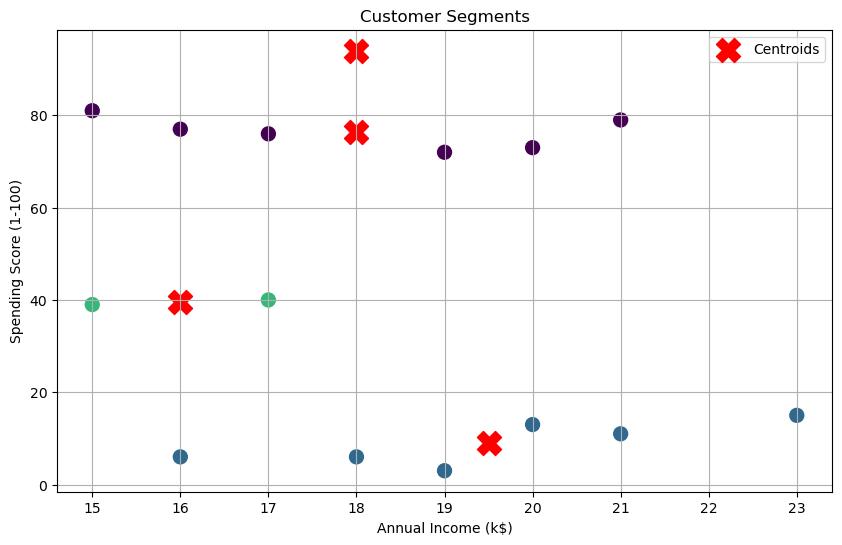

Customer data with assigned segments:
    annual_income_k  spending_score  segment
0                15              39        2
1                15              81        0
2                16               6        1
3                16              77        0
4                17              40        2
5                17              76        0
6                18               6        1
7                18              94        3
8                19               3        1
9                19              72        0
10               20              13        1
11               20              73        0
12               21              11        1
13               21              79        0
14               23              15        1


In [27]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. Create Sample Customer Data
data = {
    'annual_income_k': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 23],
    'spending_score':  [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 13, 73, 11, 79, 15]
}
df = pd.DataFrame(data)

# 3. Create and Train the K-Means Model
# We are telling the model to find 4 distinct groups (n_clusters=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df)

# 4. Assign the found segments back to the DataFrame
df['segment'] = kmeans.labels_

# 5. Visualize the Segments
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_income_k'], df['spending_score'], c=df['segment'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

print("Customer data with assigned segments:")
print(df)

Support vector machine

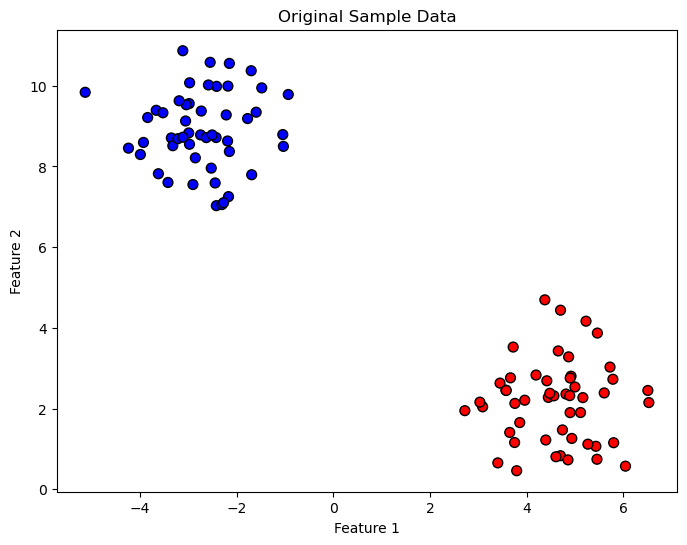

--- SVM Model Training ---
Training data size: 70
Testing data size: 30

✅ SVM Model trained successfully!
Model Accuracy on Test Data: 1.00


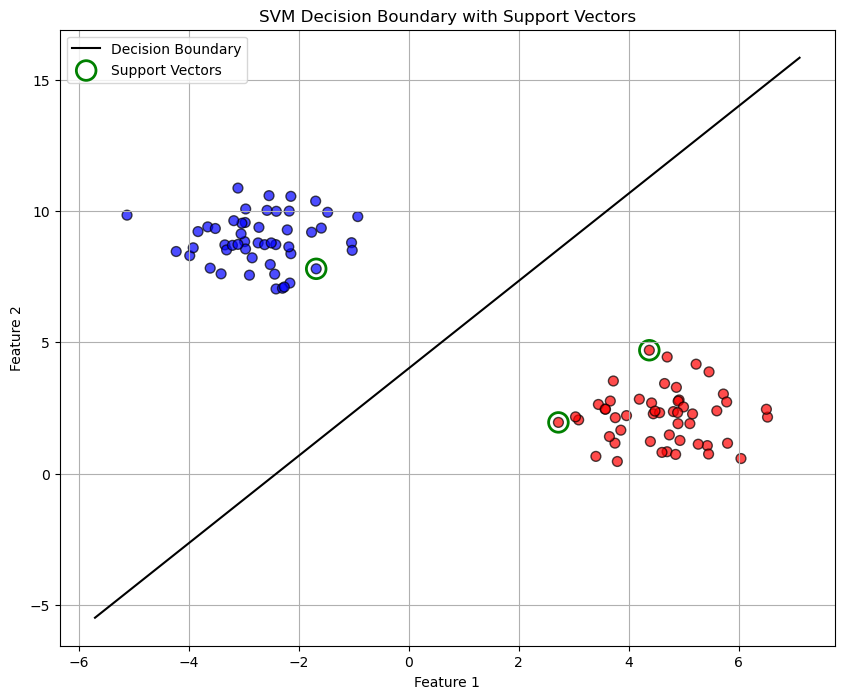


Prediction for a new point [-1 -2]: Class 1


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs # To create sample data
from sklearn.metrics import accuracy_score

# 2. Generate Sample Data for Classification
# We'll create two distinct "blobs" of data points
# X will be the features (coordinates), y will be the labels (0 or 1)
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Optional: Visualize the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolors='k')
plt.title("Original Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- SVM Model Training ---")
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

# 4. Create and Train the SVM Model
# We'll use a 'linear' kernel for simplicity to draw a straight line boundary
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

print("\n✅ SVM Model trained successfully!")

# 5. Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on Test Data: {accuracy:.2f}")

# 6. Visualize the Decision Boundary

plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolors='k', alpha=0.7)

# Get the separating hyperplane (the decision boundary)
# ax + by + c = 0  =>  y = (-a/b)x - (c/b)
w = model.coef_[0]
b = model.intercept_[0]
xx = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
yy = (-w[0] / w[1]) * xx - (b / w[1])

# Plot the decision boundary
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Highlight the support vectors
# These are the data points closest to the hyperplane
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='green', linewidths=2, label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 7. Make a prediction for a new, unseen data point
new_point = np.array([[-1, -2]]) # Example new point
prediction = model.predict(new_point)

print(f"\nPrediction for a new point {new_point[0]}: Class {prediction[0]}")

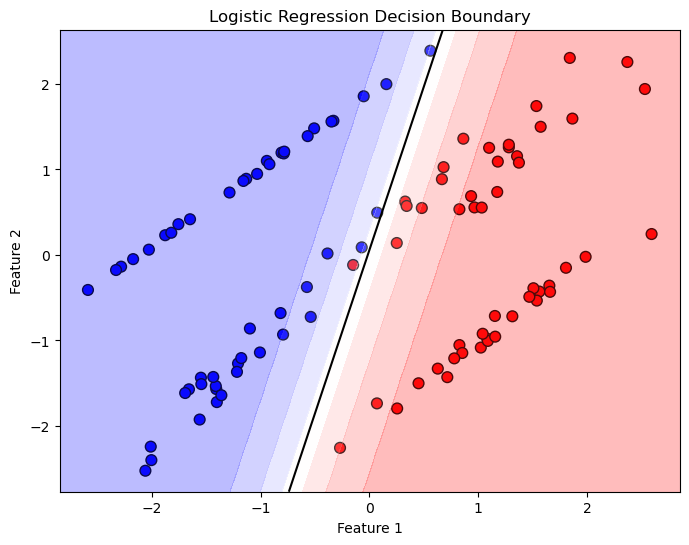

In [29]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 1. Generate sample data for classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42)

# 2. Create and train the model
model = LogisticRegression()
model.fit(X, y)

# 3. Generate the graph with the decision boundary
plt.figure(figsize=(8, 6))
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=60)

# Create a mesh to plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary and regions
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'])

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()